In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

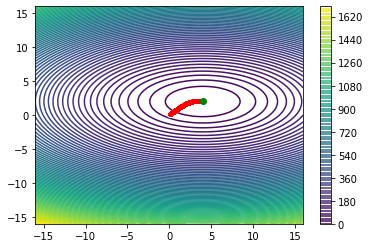

[4.0, 2.0]
100000


In [3]:
from numpy.core.fromnumeric import resize
func = lambda th: (th[0]-4)**2+4*(th[1]-2)**2

#Representamos la función
_x =np.linspace(-16,16, 100)
_y =np.linspace(-16,16, 100)
_z=np.zeros((100,100))
for ix, x in enumerate(_x):
  for iy, y in enumerate(_y):
    _z[iy,ix]=func([x,y])

plt.contour(_x,_y,_z,100)
plt.colorbar()

#Algoritmo Adadelta
min=[4,2]
Theta = [0.1,0.1]
li=0.9
E=10**(-8)
plt.plot(Theta[0],Theta[1], "o", c = "white")

grad=np.zeros(2)
Var=[0,0]
Eg = [0,0]
Evar=[0,0]
Thetaold = [0,0]
contador= 0
diferencia=1

for _ in range(100000):

  if diferencia< 10**-324:
    break
  else:
    grad[0] = 2*Theta[0]-8
    grad[1]= 8*Theta[1]-16


    for it, th in enumerate(Theta):
      Eg[it]= li*Eg[it]+ (1-li)*grad[it]**2
      Evar[it]= li*Evar[it]+ (1-li)*Var[it]**2

    #print(Eg)
    #print(Evar)

    for it, th in enumerate(Theta): 
      Thetaold [it] = Theta[it]
      Theta[it] = Theta[it] - np.sqrt(Evar[it]+E)*grad[it]/ np.sqrt(Eg[it]+E)
      Var[it]= Theta[it]-Thetaold[it]
    plt.plot(Theta[0],Theta[1], ".", c = "red")

    diferencia=np.sqrt((min[0]-Theta[0])**2+(min[1]-Theta[1])**2)
    #print(diferencia)
    contador=contador+1

plt.plot(Theta[0],Theta[1], "o", c = "green")  
plt.show()
print(Theta)
print(contador)

